In [1]:
!pip install tensorflow
!pip install matplotlib
!pip install keras

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
from keras.models import model_from_json

2023-01-09 14:06:12.574127: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-09 14:06:12.574165: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-09 14:06:14.345002: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-09 14:06:14.345147: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-01-09 14:06:14.345166: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [3]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

(60000, 28, 28)

In [4]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

2023-01-09 14:06:17.091731: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-09 14:06:17.091856: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-01-09 14:06:17.091952: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-01-09 14:06:17.153238: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-01-09 14:06:17.153457: W te

TensorShape([60000, 28, 28, 1])

In [5]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [6]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [7]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2232 - accuracy: 0.9331 - val_loss: 0.0856 - val_accuracy: 0.9758
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0850 - accuracy: 0.9739 - val_loss: 0.0514 - val_accuracy: 0.9852
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0588 - accuracy: 0.9817 - val_loss: 0.0409 - val_accuracy: 0.9876
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0454 - accuracy: 0.9857 - val_loss: 0.0299 - val_accuracy: 0.9922
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0366 - accuracy: 0.9886 - val_loss: 0.0249 - val_accuracy: 0.9926


In [8]:
lenet_5_model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.0509 - accuracy: 0.9834


[0.05086497962474823, 0.9833999872207642]

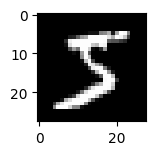

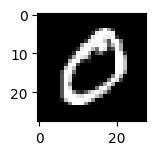

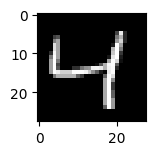

In [9]:
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [10]:
lenet_5_model.save('lenet_5_model')
print(os.listdir('lenet_5_model'))

INFO:tensorflow:Assets written to: lenet_5_model/assets


INFO:tensorflow:Assets written to: lenet_5_model/assets


['saved_model.pb', 'fingerprint.pb', 'variables', 'keras_metadata.pb', 'assets']


In [11]:
lenet_5_model.save("my.h5")

In [12]:
lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [13]:
json_model = lenet_5_model.to_json()

In [14]:
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [15]:
lenet_5_model.save_weights('FashionMNIST_weights.h5')

In [16]:
lenet_5_model.layers[0].get_weights()[0]

array([[[[ 1.12074852e-01, -3.03893864e-01,  2.06248209e-01,
          -1.58153921e-01, -2.70714879e-01, -6.53492287e-02]],

        [[-1.21849082e-01, -9.59385782e-02, -2.18190372e-01,
          -1.62336886e-01, -3.62335771e-01,  2.10702389e-01]],

        [[-2.35308230e-01, -1.90831870e-01, -5.36854684e-01,
           7.18539730e-02, -2.97498524e-01,  2.51915991e-01]],

        [[-2.75369525e-01,  1.59137826e-02, -5.60702443e-01,
           1.51761413e-01, -3.15359503e-01,  8.67698342e-02]],

        [[-3.30596596e-01,  6.91417605e-03,  4.39630559e-04,
          -1.63079545e-01, -2.06886441e-01, -2.09957674e-01]]],


       [[[ 8.05255957e-03, -3.70464206e-01,  2.01664537e-01,
           1.88608617e-01, -2.79414386e-01,  7.95653462e-03]],

        [[-3.11423063e-01, -8.92330855e-02, -3.58687222e-01,
           3.69335949e-01, -3.62120032e-01,  3.32262486e-01]],

        [[-3.23835880e-01, -1.05244823e-01, -7.57150352e-01,
           6.57952368e-01, -3.56995910e-01,  4.86671805e-01]],